# CAKE EATING PROBLEM

## Introduction

[Introduction text here]

## Imports

Imports and set magics:

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from modelproject import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Model description

**Consider the following closed form solution of the neoclassical growth model** 

The preferences are given by: $$U_0=\sum^{\infty}_{t=0}(\beta(1+n))^{t}log[c_t]$$
And the resource constraints are given by: $$(1+n)k_{t+1}=k_t^\alpha-c_t$$
$k_0$ is exogenously given. The transversality condition can be expressed as: $$\underset {T\rightarrow\infty}{lim}[k_{T+1}(\beta(1+n))^T\gamma^Tc_T^{-1}]$$
And we have $\beta(1 + n) < 1$

### Equations

The provided model is a so called Ramsey Growth Model, which includes time preferences in consumption optimisation and inter-temporal consumption choices.


The model aims to capture the dynamics of economic growth and the allocation of resources over time in an economy. It provides a framework for understanding how factors such as savings, investment, population growth, and technological progress interact to determine the long-run path of key macroeconomic variables like output, consumption, and capital accumulation.

Preferences Equation ($U_0$):
This equation represents the utility function of the representative agent in the economy. The agent aims to maximize the sum of discounted utility from consumption over an infinite time horizon. The utility function is logarithmic in consumption, implying diminishing marginal utility but a constant elasticity of intertemporal substitution due to the logarithmic form.


Resource Constraints Equation:
This equation reflects the intertemporal budget constraint of the economy. It states that the amount of consumption and investment (represented by $c_t$ and $k_{t+1}$ respectively) cannot exceed the total output of the economy at any given time $t$. Output is a function of the capital stock $k_t$ and is determined by a production function with constant returns to scale and a Cobb-Douglas form ($k_t^\alpha$).


Transversality Condition:
This condition ensures the sustainability of the economic model by asserting that the discounted value of future consumption relative to the value of the capital stock must approach zero as time extends to infinity. It prevents the economy from accumulating excessive levels of debt or capital that cannot be sustained indefinitely.


### Parameters


$\beta$: This represents the discount factor, denoting the preference of consumption today over consumption in the future. It ranges between 0 and 1, where a higher value of $\beta$ indicates a stronger preference for current consumption relative to future consumption.

$n$: This parameter signifies the population growth rate or the growth rate of the labor force. It influences the overall growth rate of the economy and affects the dynamics of capital accumulation.

$c_t$: This denotes consumption at time $t$. It represents the portion of output or income that households consume rather than save. It plays a crucial role in determining the well-being or utility of individuals over time.

$k_t$: This represents the capital stock at time $t$. Capital accumulation, along with technological progress, drives economic growth in the neoclassical growth model. The level of capital influences future production possibilities and thus affects consumption and investment decisions.

$\gamma$: The $\gamma$ here appears in the expression for the transversality condition. It is a scalar that might reflect various factors, such as the elasticity of intertemporal substitution, the rate of time preference, or other structural parameters of the model. It ensures the condition holds as $T$ approaches infinity, ensuring the model's sustainability and consistency over time.

$\alpha$: The $\alpha$ represents the output elasticity of capital in the production function.

## Planners Problem

The planners problem can be stated as the following: $$ \underset {c_t,k_t}{max} U = \sum ^{\infty}_{t=0}(\beta(1+n))^{t}log[c_t]$$
Such that: $$(1+n)k_{t+1}=k_t^\alpha-c_t$$

In the following, we provide the numerical solution to the model.

#### The Bellman Equation


The first step of our dynamic programming treatment is to obtain the Bellman equation. We let $v(x)$ be maximum lifetime utility attainable from the current time when $x$ units of consumption is left: $$v(x)= max \sum ^{\infty}_{t=0}(\beta(1+n))^{t}log[c_t]$$

We do not have an exact expression for $v(k_t)$, but we know that the function will satisfy: $$v(k_t)=\underset {c_t}{max}\{log(c_t)+\beta(1+n)v(k_{t+1}\}$$
That is, the value function is just maximising the utility received from $c$ consumption today, and discounted consumption in the future period. Choosing $c$ optimally means trading off current vs future rewards.


The Bellman equation is a concept in dynamic programming, used to recursively express the value of a decision problem over multiple time steps. It states that the value of being in a particular state equals the immediate reward obtained from that state plus the discounted value of the future rewards attainable from all possible actions. By solving the Bellman equation, we can derive optimal policies by iteratively updating value estimates until convergence, enabling efficient decision-making in sequential decision problems.







## Numerical solution

### Documentation

##### Maximize function

In our py-file we have programmed various objects. First we've defined af maximize function, which maximizes a function $g$ over the interval $[a, b]$. We use the fact that the maximizer of g on any interval is also the minimizer of -g.  The tuple args collects any extra arguments to g. See the py-script for more.

##### CakeEating Class

Additionally, we've created a class called CakeEating (refering to the popular name given to this model). The class initializes parameters such as the discount factor beta, the population growth rate n, and the production function parameter alpha.

Additionally, it constructs a grid for possible cake levels (k_grid) using specified minimum, maximum, and size parameters. The utility function (u) is defined as logarithmic, with its derivative (u_prime) implemented accordingly.

The state_action_value method calculates the value of consuming a given amount of cake (c) at a given cake level (k) based on the Bellman equation, utilizing the current value function (v_array) interpolated over the cake grid.

This method aids in evaluating the optimal consumption policy for the cake-eating problem.

##### Analysis

We start by visualising the iterative analysis by iterating over various different consumption paths.

We first define ce as an object

In [62]:
ce = CakeEating()

We then define the grid we want to examine, the initial guess and the number of iterations.

In [63]:
k_grid = ce.k_grid
v = ce.u(k_grid)       # Initial guess
n = 12                 # Number of iterations

First we plot the initial guess, and then we plot the iterations by applying the bellman equation. We've defined a function $T$ which takes $v$ and $ce$ as arguments.

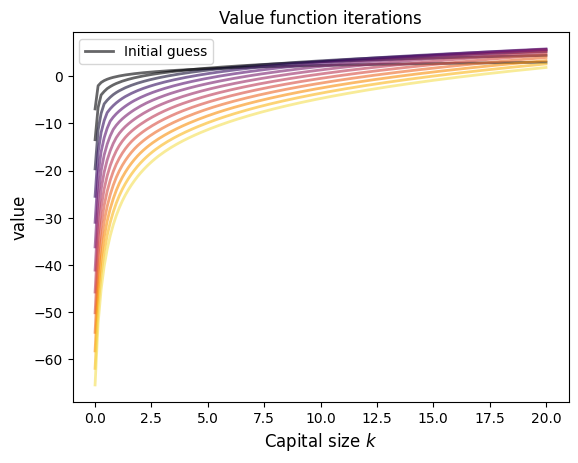

In [64]:
fig, ax = plt.subplots()

ax.plot(k_grid, v, color=plt.cm.inferno(0),
        lw=2, alpha=0.6, label='Initial guess')

for i in range(n):
    v = T(v, ce)  # Apply the Bellman operator
    ax.plot(k_grid, v, color=plt.cm.inferno(i / n), lw=2, alpha=0.6)

ax.legend()
ax.set_ylabel('value', fontsize=12)
ax.set_xlabel('Capital size $k$', fontsize=12)
ax.set_title('Value function iterations')

plt.show()

In [65]:
v, policy = compute_value_and_policy(ce)

Error at iteration 1 is 6.532637552368996.
Error at iteration 2 is 6.173342486988702.
Error at iteration 3 is 5.833808650204322.
Error at iteration 4 is 5.5129491744430865.
Error at iteration 5 is 5.209736969848716.
Error at iteration 6 is 4.923201436507036.
Error at iteration 7 is 4.652425357499148.
Error at iteration 8 is 4.3965419628367.
Error at iteration 9 is 4.154732154880676.
Error at iteration 10 is 3.9262218863622422.
Error at iteration 11 is 3.7102796826123168.
Error at iteration 12 is 3.506214300068642.
Error at iteration 13 is 3.3133725135648717.
Error at iteration 14 is 3.131137025318793.
Error at iteration 15 is 2.9589244889262716.
Error at iteration 16 is 2.7961836420353166.
Error at iteration 17 is 2.6423935417233793.
Error at iteration 18 is 2.4970618969285994.
Error at iteration 19 is 2.3597234925975243.
Error at iteration 20 is 2.229938700504661.
Error at iteration 21 is 2.1072920719769.
Error at iteration 22 is 1.9913910080181694.
Error at iteration 23 is 1.88186450

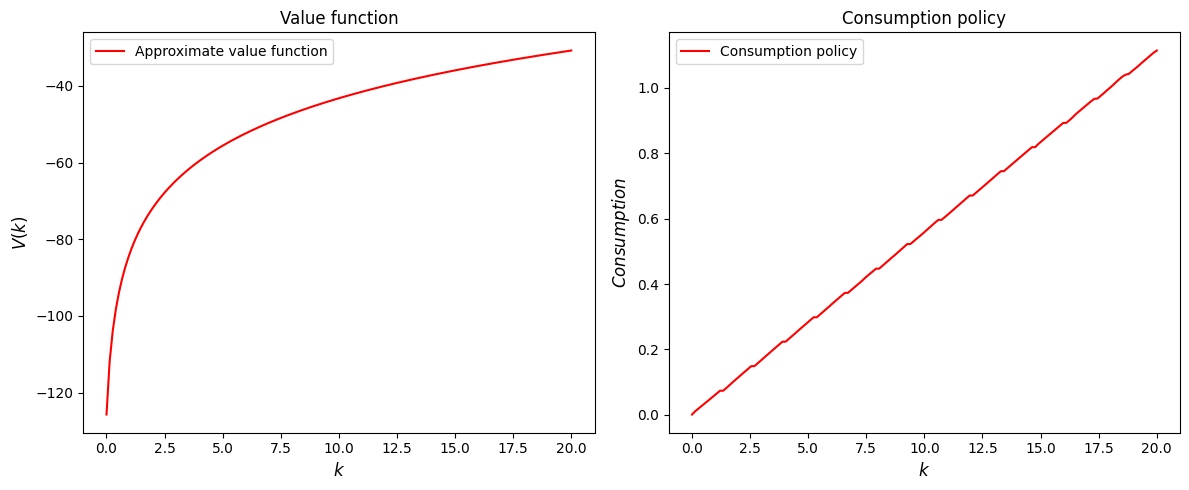

In [72]:
# Plot the value function
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(k_grid, v, label='Approximate value function', color="red")
ax[0].set_ylabel('$V(k)$', fontsize=12)
ax[0].set_xlabel('$k$', fontsize=12)
ax[0].set_title('Value function')
ax[0].legend()

# Plot the consumption policy
ax[1].plot(k_grid, policy, label='Consumption policy', color="red")
ax[1].set_ylabel('$Consumption$', fontsize=12)
ax[1].set_xlabel('$k$', fontsize=12)
ax[1].set_title('Consumption policy')
ax[1].legend()

plt.tight_layout()
plt.show()

# Further analysis

In the following, we try to examine how different $\beta$ (discount-factor) values affect the optimal consumption path.

We first import the Slider function from matplotlibs widgets.

In [67]:
from matplotlib.widgets import Slider

We then define a update function, which updates the beta value given by the Slider. Afterwards, we update ce.beta to contain the new beta value. Fiunally we update the v to contain the new value funciton given the new beta value.

In [68]:
def update(val):
    beta = slider.val
    ce.beta = beta
    v = compute_value_function(ce)
    line.set_ydata(v)
    ax.set_title('Value function (Beta = {:.2f})'.format(beta))
    fig.canvas.draw_idle()

We plot the graph, where we have added the slider in the bottom.

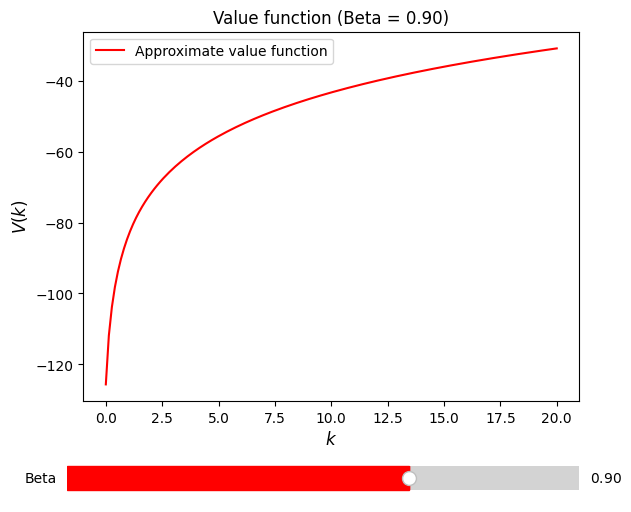

In [69]:


# Plot initial graph
fig, ax = plt.subplots()
line, = ax.plot(ce.k_grid, v, label='Approximate value function', color='red')
ax.set_ylabel('$V(k)$', fontsize=12)
ax.set_xlabel('$k$', fontsize=12)
ax.set_title('Value function (Beta = {:.2f})'.format(ce.beta))
ax.legend()

# Add slider for beta value
ax_slider = fig.add_axes([0.1, -0.1, 0.8, 0.1])
slider = Slider(ax_slider, 'Beta', 0.8, 0.95, valinit=ce.beta, color='red')
slider.on_changed(update)

plt.show()

As we have issues with the interactiveness of the slider above, ww have also created different instances of beta below:

In [70]:
# Create CakeEating instances with different beta values
betas = [0, 0.8, 0.85, 0.9]
ces = [CakeEating(beta=beta) for beta in betas]

# Compute value functions for each instance
value_functions = [compute_value_function(ce) for ce in ces]

Error at iteration 1 is 0.00480881373087616.
Error at iteration 2 is 0.0.

Converged in 2 iterations.
Error at iteration 1 is 5.807323248075871.
Error at iteration 2 is 4.878151528383732.
Error at iteration 3 is 4.097647283842335.
Error at iteration 4 is 3.4420237184275635.
Error at iteration 5 is 2.8912999234791528.
Error at iteration 6 is 2.4286919357224868.
Error at iteration 7 is 2.0401012260068896.
Error at iteration 8 is 1.7136850298457915.
Error at iteration 9 is 1.4394954250704615.
Error at iteration 10 is 1.20917615705919.
Error at iteration 11 is 1.0157079719297215.
Error at iteration 12 is 0.8531946964209638.
Error at iteration 13 is 0.7166835449936073.
Error at iteration 14 is 0.6020141777946293.
Error at iteration 15 is 0.5056919093474903.
Error at iteration 16 is 0.424781203851893.
Error at iteration 17 is 0.35681621123558926.
Error at iteration 18 is 0.2997256174378933.
Error at iteration 19 is 0.2517695186478335.
Error at iteration 20 is 0.21148639566418126.
Error at it

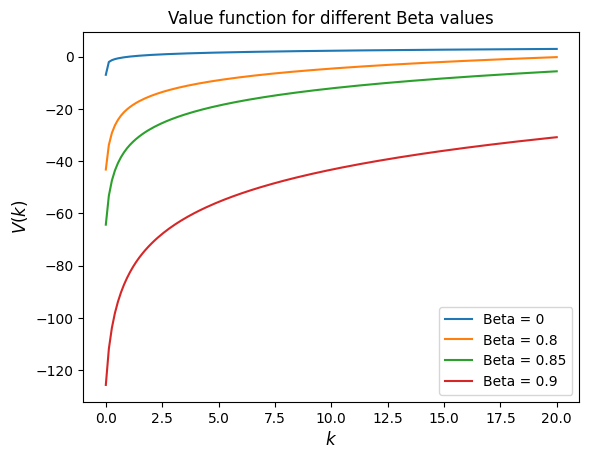

In [71]:
# Plot value functions for different beta values
fig, ax = plt.subplots()
for beta, v in zip(betas, value_functions):
    ax.plot(ces[0].k_grid, v, label=f'Beta = {beta}')

ax.set_ylabel('$V(k)$', fontsize=12)
ax.set_xlabel('$k$', fontsize=12)
ax.set_title('Value function for different Beta values')
ax.legend()
plt.show()

In the Cake Eating problem, different values of the discount factor, $\beta$, lead to distinct consumption strategies, which are clearly illustrated in the graph.

When $\beta$ is high, as seen in the case of $\beta = 0.9$, individuals place greater value on future utility, resulting in a more conservative approach to consuming the cake. This conservativeness is seen in the graph as the value function curve for $\beta = 0.9$ being positioned higher compared to other $\beta$ values, indicating a higher total utility over time from slower consumption rates.

Conversely, a lower $\beta$, such as $\beta = 0.8$, shows a preference for immediate gratification, leading to a quicker consumption of the cake. This is reflected in the graph by the curve dipping lower, illustrating a steeper decline in the resource, prioritizing present utility over future gains.

As $\beta$ increases, the value function curves are not only higher but also flatter at higher levels of $k$, suggesting that the marginal benefit of saving an additional unit of cake becomes more significant.

Thus, the graph effectively demonstrates how the choice of $\beta$ crucially affects how the initial stock of the cake is managed over time, balancing between immediate and future consumption.


# Conclusion

Add concise conclusion. 